In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

In [2]:
print (tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\Rajdeep Shil\\Anaconda3\\envs\\tf\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [3]:
#read input
df_train=pd.read_csv('train.csv')
df_test =pd.read_csv('test.csv')


# Divide training and validation (test) set 

In [4]:
from sklearn.model_selection import train_test_split
y= df_train['label']
x= df_train[df_train.columns[1:785]].div(255) ## Scaling the inputs 
x_train, x_test, y_train, y_test =train_test_split( x, y, test_size=0.15, random_state=42) # here x_test is created for validation

In [5]:
x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [6]:
len(x_train)

35700

In [7]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize the training data using matrix plot

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.iloc[[1]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_train.describe()
  


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


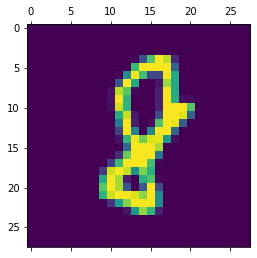

In [11]:

plt.matshow(x_test.iloc[[0]].to_numpy().reshape(28,28))

# Simple Neural Network

In [12]:
# Define sequential Network
model =keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
optimizer='adam',
loss= 'sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train,y_train, epochs=10)


Epoch 1/10
1116/1116 [==============================] - 4s 3ms/step - loss: 0.3326 - accuracy: 0.9062
Epoch 2/10
1116/1116 [==============================] - 3s 3ms/step - loss: 0.1598 - accuracy: 0.9540
Epoch 3/10
1116/1116 [==============================] - 4s 3ms/step - loss: 0.1136 - accuracy: 0.9662
Epoch 4/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0861 - accuracy: 0.9746
Epoch 5/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0676 - accuracy: 0.9793
Epoch 6/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0538 - accuracy: 0.9840
Epoch 7/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0436 - accuracy: 0.9864
Epoch 8/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0340 - accuracy: 0.9901
Epoch 9/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0281 - accuracy: 0.9920
Epoch 10/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.022

# Evaluate the model

In [13]:
print ('The accuracy of the current simple NN is ')
print ('#################')
print (model.evaluate(x_test, y_test)[1])

The accuracy of the current simple NN is 
#################
197/197 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9662
0.9661904573440552


# Use the model to predict the validation test

In [14]:
y_pred=model.predict(x_test) # Here the prediction are probability matrix between 0 and 9.


In [15]:
y_pred_argmax= [np.argmax(i) for i in y_pred] # Reducing the probability to labels with max prob

# Confusion matrix

In [16]:
CM= tf.math.confusion_matrix(
    labels=y_test, predictions=y_pred_argmax,
)

# SEABORN HEATMAP FOR CONFUSION MATRIX

Text(62.5, 0.5, 'Truth')

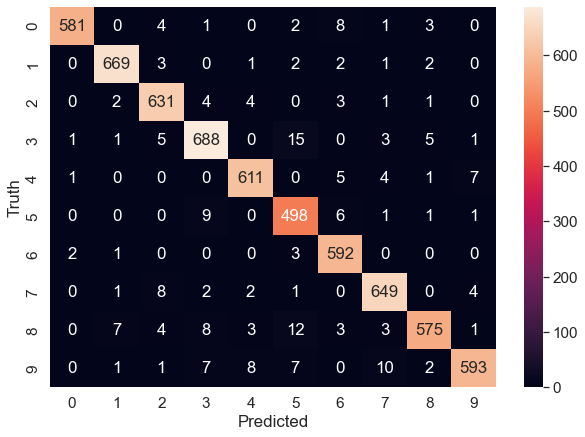

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap (CM, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Deploying the model on actual test dataset

In [18]:
# Scale the test input by dividing the values by 255
df_test_scaled= df_test.div(255) ## Scaling the inputs 

In [19]:
df_test_scaled.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000287,0.000110,0.000044,0.000026,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021464,0.014184,0.007112,0.004726,0.003167,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.756863,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [20]:
pred_test=model.predict(df_test_scaled)
pred_label_test= [np.argmax(i) for i in pred_test] # Reducing the probability to labels with max prob


In [21]:
len (pred_test)
image_id = range(1, len(pred_label_test)+1)

In [22]:
image_id[-1]

28000

# Output submission file

In [ ]:
image_id = range(1, len (pred_label_test)+1)

submission = pd.DataFrame({'ImageId': image_id, 'Label': pred_label_test})

submission.to_csv('digit_recognizer_submission', index=False)

In [ ]:
submission.head()